# __Intro to Julia: some more advanced topics__

__Index:__

1. Functions
    1. How to declare a function 
    2. Duck-typing in Julia
    3. Mutating vs. non-mutating functions
    4. Multiple dispatch
    5. Broadcast and higher order functions
2. Packages
3. Type Declaration 
4. Plotting 
5. Linear Algebra

## __Functions__

Let us start with how to declare a function in Julia.

This can be done inline:

In [ ]:
f(x) = x^3

Or in a long form definition:

In [2]:
function sayhi(name)
    println("Hi $name, how you doing?")
end

sayhi (generic function with 1 method)

We can call either this functions like 

In [3]:
sayhi("TorVergata")

Hi TorVergata, how you doing?


In [4]:
f(10)

1000

## Duck-typing in Julia

The idea is: _"If it quacks like a duck, it's a duck"_

Or in other world Julia functions will work on whatever inputs make sense.

For examples, _sayhi_ works with integer

In [5]:
sayhi(55595472)

Hi 55595472, how you doing?


And f will work on a matrix:

In [6]:
A = rand(3,3) 
A

3×3 Array{Float64,2}:
 0.223954  0.361421   0.69124
 0.746165  0.0987551  0.137799
 0.405062  0.423134   0.795508

In [9]:
f(A)



3×3 Array{Float64,2}:
 0.745224  0.576447  1.07121
 0.577274  0.410941  0.759906
 0.94814   0.726104  1.34855

f will also work with a string because the * operator is defined for string inputs as string concatenation

In [10]:
f("Hello")

"HelloHelloHello"

On the other hand, f will not work on a vector. Unlike A^2, which is well-defined, the meaning of v^2 for a vector, v, is not a well-defined algebraic operation.


In [11]:
v = rand(3)
f(v)

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...

As we will see later on, this error can be prevented by employing the so called broadcast operator ".".

## Mutating vs. non-mutating functions

By convention, functions followed by ! modify their input and functions lacking ! do not.

For example, let's look at the difference between sort and sort!

In [12]:
v = [3, 9, 1]
sort(v)

3-element Array{Int64,1}:
 1
 3
 9

In [13]:
v

3-element Array{Int64,1}:
 3
 9
 1

sort(v) returns a sorted array that contains the same values as v, but v is left unchanged.

On the other hand, using sort!(v) will modify v itself.

In [14]:
sort!(v)
v

3-element Array{Int64,1}:
 1
 3
 9

## Multiple dispatch

A key feature of Julia is multiple dispatch. This means that Julia uses all of a function's arguments to choose which method should be invoked.

In particular, multiple dispatch works on types, and the latter can be defined using the ::Type signifier:

In [15]:
g(x::Int64, y::Int64) = x + y #this function takes integers as input

g(x::Float64, y::Float64) = x * y #this function takes floats as input

println("Output with integers: ", g(2,4))
println("Output with float:    ",g(2.0,4.0))

Output with integers: 6
Output with float:    8.0


To sum up, a generic function is the abstract concept associated with a particular operation.

For example, the generic function + represents the concept of addition.

A method is a specific implementation of a generic function for particular argument types.

For example, + has methods that accept floating point numbers, integers, matrices, etc.

We can use the methods to see how many methods there are for g.

In [16]:
methods(g)

# 2 methods for generic function "g":
[1] g(x::Float64, y::Float64) in Main at In[15]:3
[2] g(x::Int64, y::Int64) in Main at In[15]:1

In [19]:
methods(+);

Multiple dispatch makes our code generic and fast. Our code can be generic and flexible because we can write code in terms of abstract operations such as addition and multiplication, rather than in terms of specific implementations. At the same time, our code runs quickly because Julia is able to call efficient methods for the relevant types.

To see which method is being dispatched when we call a generic function, we can use the @which macro:

In [20]:
@which g(1,2)

g(x::Int64, y::Int64) in Main at In[15]:1

## Broadcasting and higher order function 

An example of  a "higher-order" function in Julia is the map function. It takes a function as one of its input arguments and then applies it to every element of the data structure you pass to it.

In [21]:
f(x) = x * x
map(f, [1, 2, 3, 4])

4-element Array{Int64,1}:
  1
  4
  9
 16

In [22]:
map(f, ["ciao", "Tor", "Vergata"])

3-element Array{String,1}:
 "ciaociao"
 "TorTor"
 "VergataVergata"

We can also pass to map an anonymous function ranther than a named function  

In [23]:
map(x -> x^3, [1,2,3,4])

4-element Array{Int64,1}:
  1
  8
 27
 64

The broadcast function is another higher order function like map, but it is actually a generalization of map. so it can do everything map can do and more.

A syntactic notation for calling the broadcast function is to place a "." between the ma,e of the function you want to broadcast and its input arguments.
To give you an idea, let's apply the function f to a vector using "."

In [24]:
v = collect(1:10)
f.(v)

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Now let us look at the differences between f(A) and f.(A) when A is a matrix 

In [25]:
A = [ 2*i + 3*j for i in 1:3, j in 0:2]

3×3 Array{Int64,2}:
 2  5   8
 4  7  10
 6  9  12

In [26]:
# f(A) = A^2 = A * A
f(A)

3×3 Array{Int64,2}:
  72  117  162
  96  159  222
 120  201  282

In [27]:
# f.(A) contains the squares of all entries of A!
f.(A)


3×3 Array{Int64,2}:
  4  25   64
 16  49  100
 36  81  144

In general, the "." notation for broadcasting allows us to write relatively complex elementwise expressions in a very simple way

In [28]:
A .+ 4* f.(A) ./ f.(A.^2)

3×3 Array{Float64,2}:
 3.0      5.16      8.0625
 4.25     7.08163  10.04
 6.11111  9.04938  12.0278

which is equivalent ( but much more user friendly) to 

In [29]:
broadcast(x -> x +4*f(x)/f(x^2), A)

3×3 Array{Float64,2}:
 3.0      5.16      8.0625
 4.25     7.08163  10.04
 6.11111  9.04938  12.0278

## __Packages__

Julia has over 2000 registered packages, making packages a huge part of the Julia ecosystem.

Even so, the package ecosystem still has some growing to do. Notably, we have first class function calls to other languages, providing excellent foreign function interfaces. We can easily call into python or R, for example, with PyCall or Rcall.

This means that you don't have to wait until the Julia ecosystem is fully mature, and that moving to Julia doesn't mean you have to give up your favorite package/library from another language!

To see all available packages, check out

https://juliapackages.com or https://juliahub.com/ui/Packages

For now, let's learn how to use a package.

The first time you use a package on a given Julia installation, you need to use the package manager Pkg to explicitly add it:

In [30]:
using Pkg
Pkg.add("Example")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed Example ─ v0.5.3
   Updating `~/.julia/environments/v1.4/Project.toml`
  [7876af07] + Example v0.5.3
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [7876af07] + Example v0.5.3


Every time you use Julia (start a new session at the REPL, or open a notebook for the first time, for example), you load the package with the using keyword


In [31]:
using Example

┌ Info: Precompiling Example [7876af07-990d-54b4-ab0e-23690620f79a]
└ @ Base loading.jl:1260




In the source code of Example.jl at https://github.com/JuliaLang/Example.jl/blob/master/src/Example.jl we see the following function declared

hello(who::String) = "Hello, $who"

Having loaded Example, we should now be able to call hello


In [32]:
hello("I am a method from the Example.jl package")

"Hello, I am a method from the Example.jl package"

## __Type Declaration__

A type is what in many other languages is an "object". If that is a foreign concept, thing of a type as a thing which has named components. A type is the idea for what the thing is, while an instantiation of the type is a specific one. For example, we can think of a book as having an author and a model.

In Julia we would define the book type as follow

In [34]:
mutable struct Book
    author::String
    title::String
end
#=
specifying the type of the arguments typically enhance
Julia's performance
=#

In [35]:
mybook = Book("Primo Levi", "Se questo e' un uomo")

Book("Primo Levi", "Se questo e' un uomo")

We can grab the "fields" of the Book type by using the . syntax:

In [36]:
mybook.author

"Primo Levi"

We can also define a custom pretty-printing for a user defined type: 

In [37]:
Base.show(io::IO, b::Book) = print(io, "The author of ", b.title, " is ", b.author)

In [38]:
println(mybook)

The author of Se questo e' un uomo is Primo Levi


For sure, we can define more complex types where we explicitly code a constructor method:

In [40]:
mutable struct MyStruct
    name::String
    m::Matrix
    
    function MyStruct(_name::String, _m::Matrix)
        a = new()
        a.name = _name
        a.m = _m
        return a
    end
    
    function MyStruct(_name::String, _m::Matrix, _m1::Matrix)  # multiple dispatch constructor
        a = new()
        a.name = _name
        a.m = _m * _m1
        return a
    end
end

In [47]:
test = MyStruct("first constructor", fill(3.0, (2,2)))

MyStruct("first constructor", [3.0 3.0; 3.0 3.0])

In [48]:
test1 = MyStruct("second constructor", fill(3.0, (2,2)), fill(2.0, (2,2)))

MyStruct("second constructor", [12.0 12.0; 12.0 12.0])

In [49]:
methods(MyStruct)

# 2 methods for type constructor:
[1] MyStruct(_name::String, _m::Array{T,2} where T) in Main at In[40]:6
[2] MyStruct(_name::String, _m::Array{T,2} where T, _m1::Array{T,2} where T) in Main at In[40]:13

There are three big elements that distinguish Julia implementation from a pure Object-Oriented paradigm:

1. Firstly, in Julia you do not associate functions to a type. So, you do not call a function over a method (myobj.func(x,y)) but rather you pass the object as a parameter (func(myobj, x, y));

2. In order to extend the behaviour of any object, Julia doesn't use inheritance (only abstract classes can be inherited) but rather composition (a field of the subtype is of the higher type, allowing access to its fields). I personally believe that this is a bit a limit in the expressiveness of the language, as the code can not consider directly different concepts of relations between objects (e.g. Person->Student specialisation, Person->Arm composition, Person->Shoes weak relation );

3. Multiple-inheritance is not supported (yet).


Some useful type-related functions:

In [53]:
supertype(Float64) # returns the parent types of a type

AbstractFloat

In [59]:
subtypes(AbstractFloat) # Lists all children of a type

4-element Array{Any,1}:
 BigFloat
 Float16
 Float32
 Float64

In [60]:
fieldnames(Book) # Queries all the fields of a structure 

(:author, :title)

In [61]:
isa(mybook, Book) # check if  mybook is of type Book

true

In [62]:
typeof(mybook) # Returns the type of mybook

Book

## __Plotting__

There are few different ways to plot in Julia:
1. Plots.jl
2. GR.jl
3. PyPlot.jl

Personally I always use PyPlot, which is basically a wrapper around the python matplotlib library

In [63]:

Pkg.add("XLSX")
using PyPlot, XLSX

  Resolving package versions...
  Installed Libiconv_jll ─ v1.16.0+8
  Installed XML2_jll ───── v2.9.10+3
  Installed ZipFile ────── v0.9.4
  Installed EzXML ──────── v1.1.0
  Installed XLSX ───────── v0.7.8
######################################################################### 100,0%
######################################################################### 100,0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [fdbf4ff8] + XLSX v0.7.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [8f5d6c58] + EzXML v1.1.0
  [94ce4f54] + Libiconv_jll v1.16.0+8
  [fdbf4ff8] + XLSX v0.7.8
  [02c8fc9c] + XML2_jll v2.9.10+3
  [a5390f91] + ZipFile v0.9.4
┌ Info: Precompiling XLSX [fdbf4ff8-1666-58a4-91e7-1b58723a45e0]
└ @ Base loading.jl:1260


In [64]:
xf = XLSX.readxlsx("flowers.xlsx")
sh = xf["Full-flowering date in Kyoto"]
aa = sh[:];

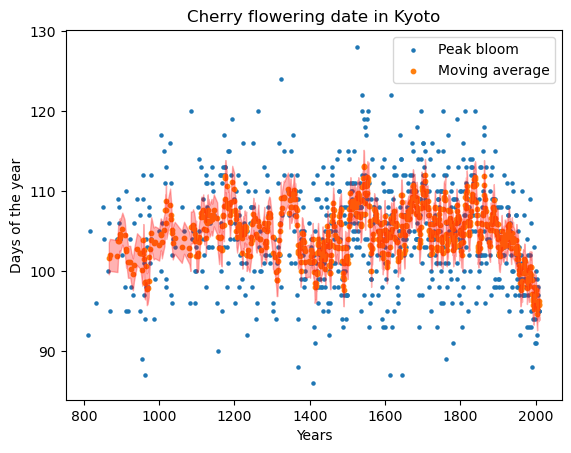

PyObject <matplotlib.legend.Legend object at 0x14f041670>

In [65]:
ad_aux = aa[1:1210,1]
day_aux = aa[1:1210,2]
idx = findall(!ismissing, day_aux)



ad = ad_aux[idx]
day = day_aux[idx]

moving_average(vs,n) = [sum(@view vs[i:(i+n-1)])/n for i in 1:(length(vs)-(n-1))]

av = moving_average(day, 7)

scatter(ad, day, s=5, label="Peak bloom")
scatter(ad[7:end], av, s=10, label="Moving average")
fill_between(ad[7:end], av .-2, av .+2, alpha=0.3, color="red")
title("Cherry flowering date in Kyoto")
xlabel("Years")
ylabel("Days of the year")
legend()

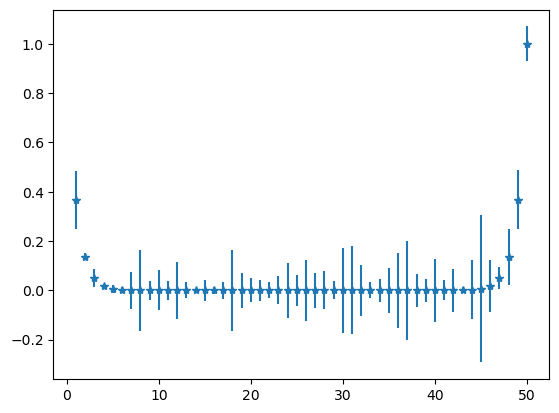

(PyObject <matplotlib.lines.Line2D object at 0x156d120a0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x156d12550>,))

In [72]:
##errorbar plots

x = collect(1:50)
f(x) = exp.(-x) .+ exp.(-50 .+x)
err = randn(50)*0.1

errorbar(x, f(x), err , fmt="*")


## __Linear Algebra__

Let us define a random matrix and a vector of ones:

In [73]:
A = rand(1:4, 4, 4)

4×4 Array{Int64,2}:
 3  1  4  4
 2  2  4  3
 1  1  3  3
 2  3  2  2

In [74]:
x = fill(1.0, 4)

4-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0

In [75]:
# Multiplication 
b = A * x

4-element Array{Float64,1}:
 12.0
 11.0
  8.0
  9.0

In [76]:
# transposition 
A' # = transpose(A)

4×4 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 3  2  1  2
 1  2  1  3
 4  4  3  2
 4  3  3  2

In [77]:
# transposed multiplication 
A'A

4×4 Array{Int64,2}:
 18  14  27  25
 14  15  21  19
 27  21  45  41
 25  19  41  38

In [78]:
# solving the linear system Ax=b for square A
A\b

4-element Array{Float64,1}:
 1.0
 0.9999999999999998
 0.9999999999999996
 1.0000000000000004

While much of linear algebra is available in Julia by default (as shown above), there's a standard library named LinearAlgebra that brings in many more relevant names and functions. In particular, it provides factorizations and some structured matrix types. As with all packages, you can bring these additional features into your session with a using LinearAlgebra.

In [79]:
using LinearAlgebra

__LU factorizations__

In [80]:
Alu = lu(A) 

LU{Float64,Array{Float64,2}}
L factor:
4×4 Array{Float64,2}:
 1.0       0.0       0.0       0.0
 0.666667  1.0       0.0       0.0
 0.333333  0.285714  1.0       0.0
 0.666667  0.571429  0.923077  1.0
U factor:
4×4 Array{Float64,2}:
 3.0  1.0       4.0        4.0
 0.0  2.33333  -0.666667  -0.666667
 0.0  0.0       1.85714    1.85714
 0.0  0.0       0.0       -1.0

In [83]:
println(Alu.P)
println(Alu.U)
println(Alu.L)


[1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0]
[3.0 1.0 4.0 4.0; 0.0 2.3333333333333335 -0.6666666666666665 -0.6666666666666665; 0.0 0.0 1.8571428571428572 1.8571428571428572; 0.0 0.0 0.0 -1.0]
[1.0 0.0 0.0 0.0; 0.6666666666666666 1.0 0.0 0.0; 0.3333333333333333 0.28571428571428575 1.0 0.0; 0.6666666666666666 0.5714285714285715 0.9230769230769231 1.0]


LU{Float64,Array{Float64,2}}
L factor:
4×4 Array{Float64,2}:
 1.0       0.0       0.0       0.0
 0.666667  1.0       0.0       0.0
 0.333333  0.285714  1.0       0.0
 0.666667  0.571429  0.923077  1.0
U factor:
4×4 Array{Float64,2}:
 3.0  1.0       4.0        4.0
 0.0  2.33333  -0.666667  -0.666667
 0.0  0.0       1.85714    1.85714
 0.0  0.0       0.0       -1.0

In [84]:
# Julia can also dispatch methods on factorization objects
Alu\b

4-element Array{Float64,1}:
 1.0
 0.9999999999999998
 0.9999999999999996
 1.0000000000000004

In [85]:
# we can also compute the determinant 
det(A) == det(Alu)

true

__QR factorizations__

In [86]:
Aqr = qr(A)
#similarly to LU we can access Aqr.Q and Aqr.R

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
4×4 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.707107   0.657596   0.235702   0.109599
 -0.471405  -0.219199  -0.471405  -0.712396
 -0.235702  -0.109599  -0.707107   0.657596
 -0.471405  -0.712396   0.471405   0.219199
R factor:
4×4 Array{Float64,2}:
 -4.24264  -3.29983  -6.36396  -5.89256
  0.0      -2.02759   0.0       0.219199
  0.0       0.0      -2.12132  -1.64992
  0.0       0.0       0.0       0.712396

__Eigendecompositions__


In [87]:
Aeig = eigen(A)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
4-element Array{Complex{Float64},1}:
 -0.3565358895955007 - 1.0603589190804354im
 -0.3565358895955007 + 1.0603589190804354im
  1.0781288892998147 + 0.0im
   9.634942889891182 + 0.0im
vectors:
4×4 Array{Complex{Float64},2}:
   0.35038+0.106856im    0.35038-0.106856im    -0.84725+0.0im  0.591222+0.0im
 0.0316004+0.356036im  0.0316004-0.356036im    0.313045+0.0im  0.537289+0.0im
  0.423066-0.271558im   0.423066+0.271558im    0.419468+0.0im  0.380655+0.0im
 -0.696655-0.0im       -0.696655+0.0im       -0.0906525+0.0im  0.465703+0.0im

In [88]:
Aeig.values

4-element Array{Complex{Float64},1}:
 -0.3565358895955007 - 1.0603589190804354im
 -0.3565358895955007 + 1.0603589190804354im
  1.0781288892998147 + 0.0im
   9.634942889891182 + 0.0im

In [89]:
Aeig.vectors

4×4 Array{Complex{Float64},2}:
   0.35038+0.106856im    0.35038-0.106856im    -0.84725+0.0im  0.591222+0.0im
 0.0316004+0.356036im  0.0316004-0.356036im    0.313045+0.0im  0.537289+0.0im
  0.423066-0.271558im   0.423066+0.271558im    0.419468+0.0im  0.380655+0.0im
 -0.696655-0.0im       -0.696655+0.0im       -0.0906525+0.0im  0.465703+0.0im